<a href="https://colab.research.google.com/github/Yta-ux/estudo-estatistica/blob/main/Estat%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estatística e Probabilidade

É a ciência que coleta, organiza, analisa e interpreta dados para tomada de decisão.
- Dados são informações que vêm de observações, contagens, medições ou respostas

## População e Amostra

**População** são todos os dados do nosso conjunto de estudo, ou seja, dados de todo o universo a ser estudado naquele momento.
**Amostra** é um subconjunto dessa população, uma parcela que represente ela para que sejam realizadas inferências.

> Dados coletados de forma correta, irão fornecer inferências corretas.



## Estatística Descritiva e Inferencial

**Estatística Descritiva:** Ramo da estatística que trabalha com o conjunto universo, organizando, resumindo e representando os dados.

**Estatística Inferencial:**Ramo que envolve o trabalho com amostras para chegar a conclusões sobre uma população - probabilidade

# Estatística Descritiva

Fornece métodos para organização e descrição do conjunto de dados. Sendo aplicado em uma coleta de população.

Tem como objetivo tornar os dados mais fáceis de serem entendidos.

## Distribuição de Frequência

- Sua ideia principal é agrupar intervalos chamados de classes, e atribui-los a uma frequência.

- Fornece uma organização para dados brutos.

- Dispõe os dados com base nas ocorrências de cada uma das classes.

- As classes possuem seu limite inferior e superior, a distância entre esses limites (intervalo fechado) é chamada de **largura**.

In [ ]:
import pandas as pd

# Definição do número de classes e seleção da base de dados
n_classes = 5
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/day.csv')
alugueis = data.cnt


# Encontrar a amplitude dos dados

maior = max(alugueis)
menor = min(alugueis)
amplitude = maior - menor

# Encontrar a amplitude das classes

amplitude_classe = round(amplitude/n_classes) # Mesma coisa que a largura da classe

# Limites de classes
limites_inf = [menor]

for x in range(n_classes):
  limites_inf.append(limites_inf[x]+amplitude_classe)

limites_inf

# Contar ocorrências nas classes
frequencias = {'classe1':0, 'classe2':0, 'classe3':0, 'classe4':0, 'classe5':0}

for numero in alugueis:
  if numero < limites_inf[1]:
    frequencias['classe1'] +=1
  elif numero < limites_inf[2]:
    frequencias['classe2'] +=1
  elif numero < limites_inf[3]:
    frequencias['classe3'] +=1
  elif numero < limites_inf[5]:
    frequencias['classe4'] +=1
  else:
    frequencias['classe5'] +=1

frequencias

{'classe1': 11, 'classe2': 27, 'classe3': 30, 'classe4': 12, 'classe5': 0}

### Frequência Relativa

- É baseada no percentual de frequência que determinada classe possui.
- Alteraçãoo nos dados da escala.
- Para conseguir essa medida, basta pegar as frequências coletadas e dividir pelas ocorrências (quantidade máxima do array)

In [ ]:
n_ocorrencias = len(alugueis)

for classe in frequencias:
  frequencias[classe] = (frequencias[classe] / n_ocorrencias) * 100
frequencias

{'classe1': 13.750000000000002,
 'classe2': 33.75,
 'classe3': 37.5,
 'classe4': 15.0,
 'classe5': 0.0}

### Histograma de Frequência

- Gráfico que facilita a visualização dos dados.
- Um historigrama de frequência é um diagrama com barras que representam a distribuição de frequência de um conjunto de dados.
- Propriedades:
  - A escala horizontal representa os valores das faixas de cada classe.
  - A escala vertical mede a frequência de cada classe.
  - As barras consecutivas devem estar encostadas umas nas outras.



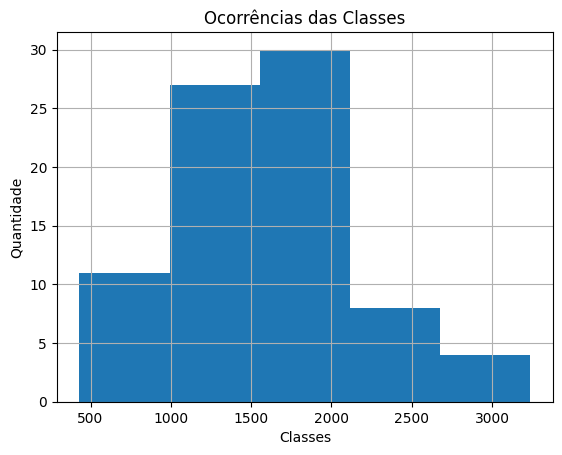

In [ ]:
import matplotlib.pyplot as plt

plt.hist(alugueis, 5)
plt.xlabel('Classes')
plt.ylabel('Quantidade')
plt.title('Ocorrências das Classes')
plt.grid(True)
plt.show()

## Medidas de Tendência Central
- São medidas que buscam descrever um conjunto de dados a partir de um valor central.
- As distribuições de frequências e os gráficos de frequência são poderosas ferramentas.

### Média

- Medida mais conhecida e aplicada no meio estatístico.
- Méda é soma de todos os valores dividido pela quantidade total desses valores.

$$
\overline{x} = \frac{\sum_{i=1}^n x_i}{n}
$$

- $\overline{x}$ : Representa a média simples.
- $x_i$ : É o valor de cada elemento (ou dado) que será considerado.
- $n$ : É o número total de elementos considerados na média.
- $\sum$ : Representa o somatório.
- $\sum_{i=1}^n x_i$ : É o somatório de todos os valores dos elementos.



In [ ]:
import numpy as np

# Usando python nativo
media_alugueis = sum(alugueis)/len(alugueis)

# Usando a lib numpy

np.mean(alugueis)

1621.0875

### Mediana

- Será o valor que está exatamente no meio de um conjunto de dados ordenado.
- Divide o conjunto de dados em duas partes.
- Se o conjunto for ímpar, a mediana é a entrada de dados do meio.
- Se for par, a entrada será uma média das duas entradas do meio.

In [ ]:
# Ordena o conjunto de dados
alugueis = sorted(alugueis)

# Calcula o valor da mediana com base na quantidade de elementos do conjunto

if len(alugueis) % 2 == 0:
  indice = (len(alugueis) - 1) // 2
  mediana = (alugueis[indice] + alugueis[ indice + 1]) / 2
else:
  mediana = alugueis[len(alugueis) / 2]


# Calculando a mediana com numpy
np.median(alugueis)

1594.5

### Moda

- É o conjunto de dados com base na ocorrência de determinado valor.
- Se nenhuma ocorrência se repetir, a moda não vai existir


In [ ]:
# Criando array
contagens = [0]*len(alugueis)

# Contando ocorrências
for i in range(len(alugueis)):
  contagens[i] = alugueis.count(alugueis[i])

contagens
max(contagens)


indices_moda = np.where(np.array(contagens) == max(contagens))
for indice in indices_moda[0]:
  print(alugueis[indice])

TypeError: Series.count() takes 1 positional argument but 2 were given

### Qual medida de tendência central eu devo utilizar?

- Média e Mediana são as mais comuns e utilizadas.
- Média é influenciadas por valores discrepantes (outliers).
- Mediana não é afetada por esses valores.

### Média Ponderada

- Média utilizada quando temos um cojunto de valores possui um grau de importância.
- Adicionar pesos nos valores que são necessários.
- É o valor * o peso, tudo isso dividido pela soma dos pesos.

$$
\overline{x} = \frac{\sum_{i=1}^n w_i x_i}{\sum_{i=1}^n w_i}
$$

**Onde:**

- $\overline{x}$ : Representa a média ponderada.
- $x_i$ : É o valor de cada elemento (ou dado) que será considerado.
- $w_i$ : É o peso atribuído ao elemento $x_i$, indicando sua relevância ou importância.
- $n$ : É o número total de elementos considerados na média.
- $\sum$ : Representa o somatório.
- $\sum_{i=1}^n w_i x_i$ : É o somatório do produto entre cada valor $x_i$ e seu respectivo peso $w_i$.
- $\sum_{i=1}^n w_i$ : É o somatório dos pesos atribuídos aos elementos.

## Medidas de Variação